In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 1.3 MB/s eta 0:01:58
   ---------------------------------------- 0.1/150.0 MB 919.0 kB/s eta 0:02:44
   ---------------------------------------- 0.2/150.0 MB 2.0 MB/s eta 0:01:16
   ---------------------------------------- 0.6/150.0 MB 4.0 MB/s eta 0:00:38
   ---------------------------------------- 1.2/150.0 MB 5.8 MB/s eta 0:00:26
   ---------------------------------------- 1.5/150.0 MB 5.7 MB/s eta 0:00:26
   ---------------------------------------- 1.8/150.0 MB 6.4 MB/s eta 0:00:24
   ---------------------------------------- 1.8/150.0 MB 6.4 MB/s eta 0:00:24
    --------------------------------------- 1.9/150.0 MB 5.0 MB/s eta 0:00:30
    --------------------------------------- 1.9/150.0 MB 5.0 MB/s eta 0:00:30
    --------------------------------------- 1.9/150.0 MB 5.0 MB/s eta 0:00:3

In [6]:
df=pd.read_excel("C:/Users/arshi/OneDrive/Documents/HealthCareData.xlsx")

In [7]:
df.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [8]:
df["Blood pressure (mmhg)"].value_counts()

Blood pressure (mmhg)
110/70     135
130/90      74
130/80      68
140/90      56
120/80      45
112/70      40
140/100     37
140/80      37
130/70      34
116/80      30
120/70      21
130/76      20
118/70      20
98/60       19
160/100     19
138/90      19
140/84      18
108/72      13
96/62       10
120/91      10
80/60       10
110/170     10
100/60      10
138/88      10
98/70       10
102/60      10
70/60       10
90/60       10
102/70      10
126/70      10
130/78      10
120/86      10
120/78      10
114/70      10
116/70       9
142/84       9
144/92       9
136/82       9
150/94       9
130/84       9
126/86       9
98/72        8
134/84       8
150/90       1
108/75       1
120/79       1
110/80       1
124/84       1
120/90       1
Name: count, dtype: int64

In [9]:
df.shape

(950, 42)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 42 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   S.NO                                                                     950 non-null    int64  
 1   Age                                                                      950 non-null    int64  
 2   Gender                                                                   950 non-null    object 
 3   Place(location where the patient lives)                                  816 non-null    object 
 4   Duration of alcohol consumption(years)                                   950 non-null    int64  
 5   Quantity of alcohol consumption (quarters/day)                           950 non-null    int64  
 6   Type of alcohol consumed                                                 9

In [14]:
df["Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)"].value_counts()

Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)
YES    876
no      20
Name: count, dtype: int64

In [15]:
df.isnull().sum()

S.NO                                                                         0
Age                                                                          0
Gender                                                                       0
Place(location where the patient lives)                                    134
Duration of alcohol consumption(years)                                       0
Quantity of alcohol consumption (quarters/day)                               0
Type of alcohol consumed                                                     0
Hepatitis B infection                                                        0
Hepatitis C infection                                                        0
Diabetes Result                                                              0
Blood pressure (mmhg)                                                        0
Obesity                                                                      0
Family history of cirrhosis/ hereditary             

In [16]:
df.duplicated().sum()

0

In [17]:
object_cols = df.select_dtypes(include='object').columns.tolist()
for col in object_cols:
  print(col)

Gender
Place(location where the patient lives)
Type of alcohol consumed
Hepatitis B infection
Hepatitis C infection
Diabetes Result
Blood pressure (mmhg)
Obesity
Family history of cirrhosis/ hereditary
TG
LDL
Total Bilirubin    (mg/dl)
A/G Ratio
USG Abdomen (diffuse liver or  not)
Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)


In [18]:
print(df["TG"].head(3))
print(df["LDL"].head(3))
print(df["Total Bilirubin    (mg/dl)"].head(3))

0    115
1    115
2    115
Name: TG, dtype: object
0    120
1    120
2    120
Name: LDL, dtype: object
0    7
1    7
2    7
Name: Total Bilirubin    (mg/dl), dtype: object


In [19]:
print(df["TG"].value_counts())
print(df["LDL"].value_counts())
print(df["Total Bilirubin    (mg/dl)"].value_counts())

TG
160       65
156       42
120       37
184       32
180       30
190       28
170       27
166       19
186       18
172       18
174       17
136       14
168       13
146       13
150       11
140       11
118       11
130       10
197       10
151       10
188       10
178        9
195        9
115        9
173        9
177        9
100        9
86         9
162        9
171        8
176        8
206        8
192        8
200        8
189        8
106        8
164        8
144        7
139        1
130LDL     1
Name: count, dtype: int64
LDL
120    82
110    58
108    56
96     50
105    40
104    33
79     32
116    18
90     18
85     17
98     17
109    14
129    13
80     11
122    10
136    10
115    10
88     10
94     10
65      9
49      9
200     9
180     9
100     9
99      9
91      9
86      8
106     8
HDL     1
220     1
111     1
Name: count, dtype: int64
Total Bilirubin    (mg/dl)
7       77
4.8     48
4.2     40
6       40
6.8     39
8.4     39
5.6     38
10.9   

In [21]:
df = df[df['TG'] != '130LDL']
df = df[df['LDL'] != 'HDL']
df = df[df['Total Bilirubin    (mg/dl)'] != 'o.4']

In [22]:
df["TG"] = df["TG"].astype(float)
df["LDL"] = df["LDL"].astype(float)
df["Total Bilirubin    (mg/dl)"] = df["Total Bilirubin    (mg/dl)"].astype(float)

In [23]:
df["Blood pressure (mmhg)"].value_counts()

Blood pressure (mmhg)
110/70     135
130/90      74
130/80      66
140/90      56
120/80      45
112/70      40
140/100     37
140/80      37
130/70      34
116/80      30
120/70      21
130/76      20
118/70      20
98/60       19
160/100     19
138/90      19
140/84      18
108/72      13
96/62       10
120/91      10
80/60       10
110/170     10
100/60      10
138/88      10
98/70       10
102/60      10
70/60       10
90/60       10
102/70      10
126/70      10
130/78      10
120/86      10
120/78      10
114/70      10
116/70       9
142/84       9
144/92       9
136/82       9
150/94       9
130/84       9
98/72        8
134/84       8
126/86       8
150/90       1
108/75       1
120/79       1
110/80       1
124/84       1
120/90       1
Name: count, dtype: int64

In [24]:
df["Blood pressure (mmhg)"] = df["Blood pressure (mmhg)"].str.replace('/', '/').str.split('/').apply(lambda x: float(x[0]) / float(x[1]))

In [25]:
df["Quantity of alcohol consumption (quarters/day)"].value_counts()

Quantity of alcohol consumption (quarters/day)
2      520
3      198
1      158
4       54
180     16
5        1
Name: count, dtype: int64

In [26]:
df["Quantity of alcohol consumption (quarters/day)"] = df["Quantity of alcohol consumption (quarters/day)"].replace(180, 5)

In [27]:
df["Quantity of alcohol consumption (quarters/day)"].value_counts()

Quantity of alcohol consumption (quarters/day)
2    520
3    198
1    158
4     54
5     17
Name: count, dtype: int64

In [28]:
df["Platelet Count  (lakhs/mm)"].value_counts()

Platelet Count  (lakhs/mm)
1.200        100
1.500         84
1.800         68
1.000         51
1.100         49
1.700         46
1.400         41
1.600         37
1.900         29
2.300         22
2.000         20
1.670         20
1.300         20
1.380         20
0.980         19
1.550         19
1.420         18
2.400         11
1.350         10
1.320         10
1.170         10
1.280         10
1.020         10
2.800         10
1.090         10
1.560         10
1.760         10
0.520         10
0.650         10
1.580         10
2.200         10
0.910         10
0.780         10
1.160         10
1.036         10
1.210         10
1.450         10
0.940          9
1.220          9
1.830          9
1.920          9
1.520          9
1.340          9
1.230          9
0.900          5
90000.000      5
3.000          3
1.750          2
2.500          2
3.200          2
0.550          1
Name: count, dtype: int64

In [29]:
df = df[df["Platelet Count  (lakhs/mm)"] != 90000.000]

In [30]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
  df[col].fillna(df[col].mean(), inplace=True)

df.isnull().sum()

S.NO                                                                         0
Age                                                                          0
Gender                                                                       0
Place(location where the patient lives)                                    133
Duration of alcohol consumption(years)                                       0
Quantity of alcohol consumption (quarters/day)                               0
Type of alcohol consumed                                                     0
Hepatitis B infection                                                        0
Hepatitis C infection                                                        0
Diabetes Result                                                              0
Blood pressure (mmhg)                                                        0
Obesity                                                                      0
Family history of cirrhosis/ hereditary             

In [31]:
df["TG"] = df["TG"].astype(int)
df["LDL"] = df["LDL"].astype(int)

In [32]:
df["A/G Ratio"].value_counts()

A/G Ratio
0.75                   86
01:01:00               59
01:03:00               32
01:02:00               28
1900-01-01 00:00:00    24
02:01:00               21
1.214                  20
0.6                    20
1.5:1                  19
0.5                    19
0.77                   18
0.87                   18
03:01:00               16
0.6:1                  13
02:03:00               12
0.44                   10
0.575                  10
0.42                   10
0.8                    10
1.18                   10
0.84                   10
1.66                   10
2.2                     9
0.72                    9
0.86                    9
0.48                    9
0.31                    9
0.5.                    9
0.78                    9
2.45                    9
1.8                     6
1.68                    6
00:01:02.200000         6
12:00:00                4
00:01:00.875000         3
00:01:01.500000         3
00:01:03.500000         3
1900-01-03 00:00:00     3
19

In [33]:
df["Albumin   (g/dl)"].value_counts()

Albumin   (g/dl)
2.000000     148
3.000000     136
2.500000      69
3.200000      57
1.200000      51
2.100000      48
1.800000      38
2.800000      37
1.600000      30
2.700000      29
4.000000      28
2.900000      27
1.500000      21
2.300000      20
2.200000      19
3.100000      19
4.200000      12
1.000000      10
7.700000      10
1.900000      10
0.900000      10
1.400000      10
5.000000      10
3.400000      10
1.100000      10
22.000000      9
2.797106       9
2.600000       9
3.600000       9
4.600000       9
5.400000       9
8.100000       8
2.400000       5
4.500000       2
3.800000       2
5.200000       2
Name: count, dtype: int64

In [34]:
df=df[df["Albumin   (g/dl)"]!=22.0]
df["Globulin  (g/dl)"].value_counts()

Globulin  (g/dl)
4.000000     127
2.000000     118
3.000000      88
2.800000      65
2.500000      51
3.100000      47
3.500000      41
4.300000      38
1.000000      30
3.245455      29
3.800000      29
3.600000      27
4.100000      20
6.000000      19
3.300000      19
4.800000      19
2.200000      18
2.600000      18
4.200000      10
3.200000      10
4.500000      10
4.600000      10
4.900000      10
1.600000      10
4.400000      10
5.100000      10
2.700000      10
1.800000      10
2.300000       9
3.700000       9
3.900000       9
3.400000       2
30.000000      1
Name: count, dtype: int64

In [35]:
df=df[df["Globulin  (g/dl)"]!=30.0]

In [36]:
df["A/G Ratio"] = round(df["Albumin   (g/dl)"]/df["Globulin  (g/dl)"],2)
df["A/G Ratio"].value_counts()

A/G Ratio
1.00    99
0.75    87
0.67    49
0.43    30
0.50    30
0.61    29
0.86    24
1.14    20
3.00    20
1.50    20
0.32    20
0.89    19
0.49    19
0.87    19
0.81    19
2.00    19
0.54    18
0.78    18
0.90    18
0.46    11
1.20    11
0.37    11
0.42    10
1.10    10
0.44    10
1.19    10
0.64    10
0.60    10
1.68    10
0.29    10
0.39    10
0.36    10
0.40    10
0.84    10
0.25    10
1.67    10
1.21    10
0.38    10
0.57    10
2.20    10
0.94    10
0.41    10
0.79     9
1.82     9
2.45     9
0.33     9
2.30     9
0.77     9
0.69     9
1.23     9
0.93     9
0.88     9
1.07     9
0.72     9
2.50     8
1.80     2
1.27     2
1.53     2
Name: count, dtype: int64

In [37]:
df["A/G Ratio"]=df["A/G Ratio"].astype(float)
df["A/G Ratio"].fillna(df["A/G Ratio"].mean(), inplace=True)

In [38]:
null_columns = df.isnull().sum()
null_columns = null_columns[null_columns > 0]
for column, count in null_columns.items():
  print(f"{column}: {count}")

Place(location where the patient lives): 133
Predicted Value(Out Come-Patient suffering from liver  cirrosis or not): 54


In [39]:
for i in df.columns:
  if df[i].dtype == 'object' and i!="Blood pressure (mmhg)":
    print(df[i].value_counts())
    print("-"*50)

Gender
male           723
female         194
female          10
transgender      5
Name: count, dtype: int64
--------------------------------------------------
Place(location where the patient lives)
rural    443
urban    355
 ocun      1
Name: count, dtype: int64
--------------------------------------------------
Type of alcohol consumed
country liquor     468
both               282
branded liquor     181
 branded liquor      1
Name: count, dtype: int64
--------------------------------------------------
Hepatitis B infection
negative    779
Positive    152
positive      1
Name: count, dtype: int64
--------------------------------------------------
Hepatitis C infection
negative    796
Positive    134
positive      2
Name: count, dtype: int64
--------------------------------------------------
Diabetes Result
YES    633
NO     299
Name: count, dtype: int64
--------------------------------------------------
Obesity
yes    536
no     396
Name: count, dtype: int64
-------------------------

In [40]:
df = df[df['Place(location where the patient lives)'] != ' ocun']

In [41]:
df["Gender"].replace("female ","female",inplace=True)

In [42]:
df["Gender"].value_counts()

Gender
male           722
female         204
transgender      5
Name: count, dtype: int64

In [43]:
df["Type of alcohol consumed"].replace(" branded liquor","branded liquor",inplace=True)

In [44]:
df["Type of alcohol consumed"].value_counts()

Type of alcohol consumed
country liquor    468
both              281
branded liquor    182
Name: count, dtype: int64

In [45]:
df["Hepatitis B infection"].replace("Positive","positive",inplace=True)
df["Hepatitis C infection"].replace("Positive","positive",inplace=True)

In [46]:
df["Hepatitis B infection"].value_counts()

Hepatitis B infection
negative    778
positive    153
Name: count, dtype: int64

In [47]:
df["Hepatitis C infection"].value_counts()

Hepatitis C infection
negative    795
positive    136
Name: count, dtype: int64

In [48]:
df["Family history of cirrhosis/ hereditary"].replace("husband","yes",inplace=True)
df["Family history of cirrhosis/ hereditary"].value_counts()

Family history of cirrhosis/ hereditary
no     853
yes     78
Name: count, dtype: int64

In [49]:
df["Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)"].replace("YES","yes",inplace=True)
df["Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)"].value_counts()

Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)
yes    859
no      18
Name: count, dtype: int64

In [50]:
for i in df.columns:
  if df[i].dtype == 'object' and i!="Blood pressure (mmhg)":
    print(df[i].value_counts())
    print("-"*50)

Gender
male           722
female         204
transgender      5
Name: count, dtype: int64
--------------------------------------------------
Place(location where the patient lives)
rural    443
urban    355
Name: count, dtype: int64
--------------------------------------------------
Type of alcohol consumed
country liquor    468
both              281
branded liquor    182
Name: count, dtype: int64
--------------------------------------------------
Hepatitis B infection
negative    778
positive    153
Name: count, dtype: int64
--------------------------------------------------
Hepatitis C infection
negative    795
positive    136
Name: count, dtype: int64
--------------------------------------------------
Diabetes Result
YES    633
NO     298
Name: count, dtype: int64
--------------------------------------------------
Obesity
yes    536
no     395
Name: count, dtype: int64
--------------------------------------------------
Family history of cirrhosis/ hereditary
no     853
yes     78
Na

In [57]:
df.rename(columns={"Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)": "Outcome"}, inplace=True)

In [58]:

df.columns

Index(['Age', 'Gender', 'Duration of alcohol consumption(years)',
       'Quantity of alcohol consumption (quarters/day)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TCH', 'TG',
       'LDL', 'HDL', 'Hemoglobin  (g/dl)', 'PCV  (%)',
       'RBC  (million cells/microliter)', 'MCV   (femtoliters/cell)',
       'MCH  (picograms/cell)', 'MCHC  (grams/deciliter)', 'Total Count',
       'Polymorphs  (%) ', 'Lymphocytes  (%)', 'Monocytes   (%)',
       'Eosinophils   (%)', 'Basophils  (%)', 'Platelet Count  (lakhs/mm)',
       'Total Bilirubin    (mg/dl)', 'Direct    (mg/dl)',
       'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)',
       'Globulin  (g/dl)', 'A/G Ratio', 'AL.Phosphatase      (U/L)',
       'SGOT/AST      (U/L)', 'SGPT/ALT (U/L)',
       'USG Abdomen (diffuse liver or  not)', 'Outcome'],
      dtype='o

In [59]:
df["Outcome"].value_counts()

Outcome
yes    859
no      18
Name: count, dtype: int64

In [60]:
df["Outcome"].isnull().sum()

54

In [61]:
df["Outcome"].fillna("yes", inplace=True)

In [62]:
df.isnull()

,Age,Gender,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Blood pressure (mmhg),Obesity,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Outcome
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
946,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
947,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
948,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


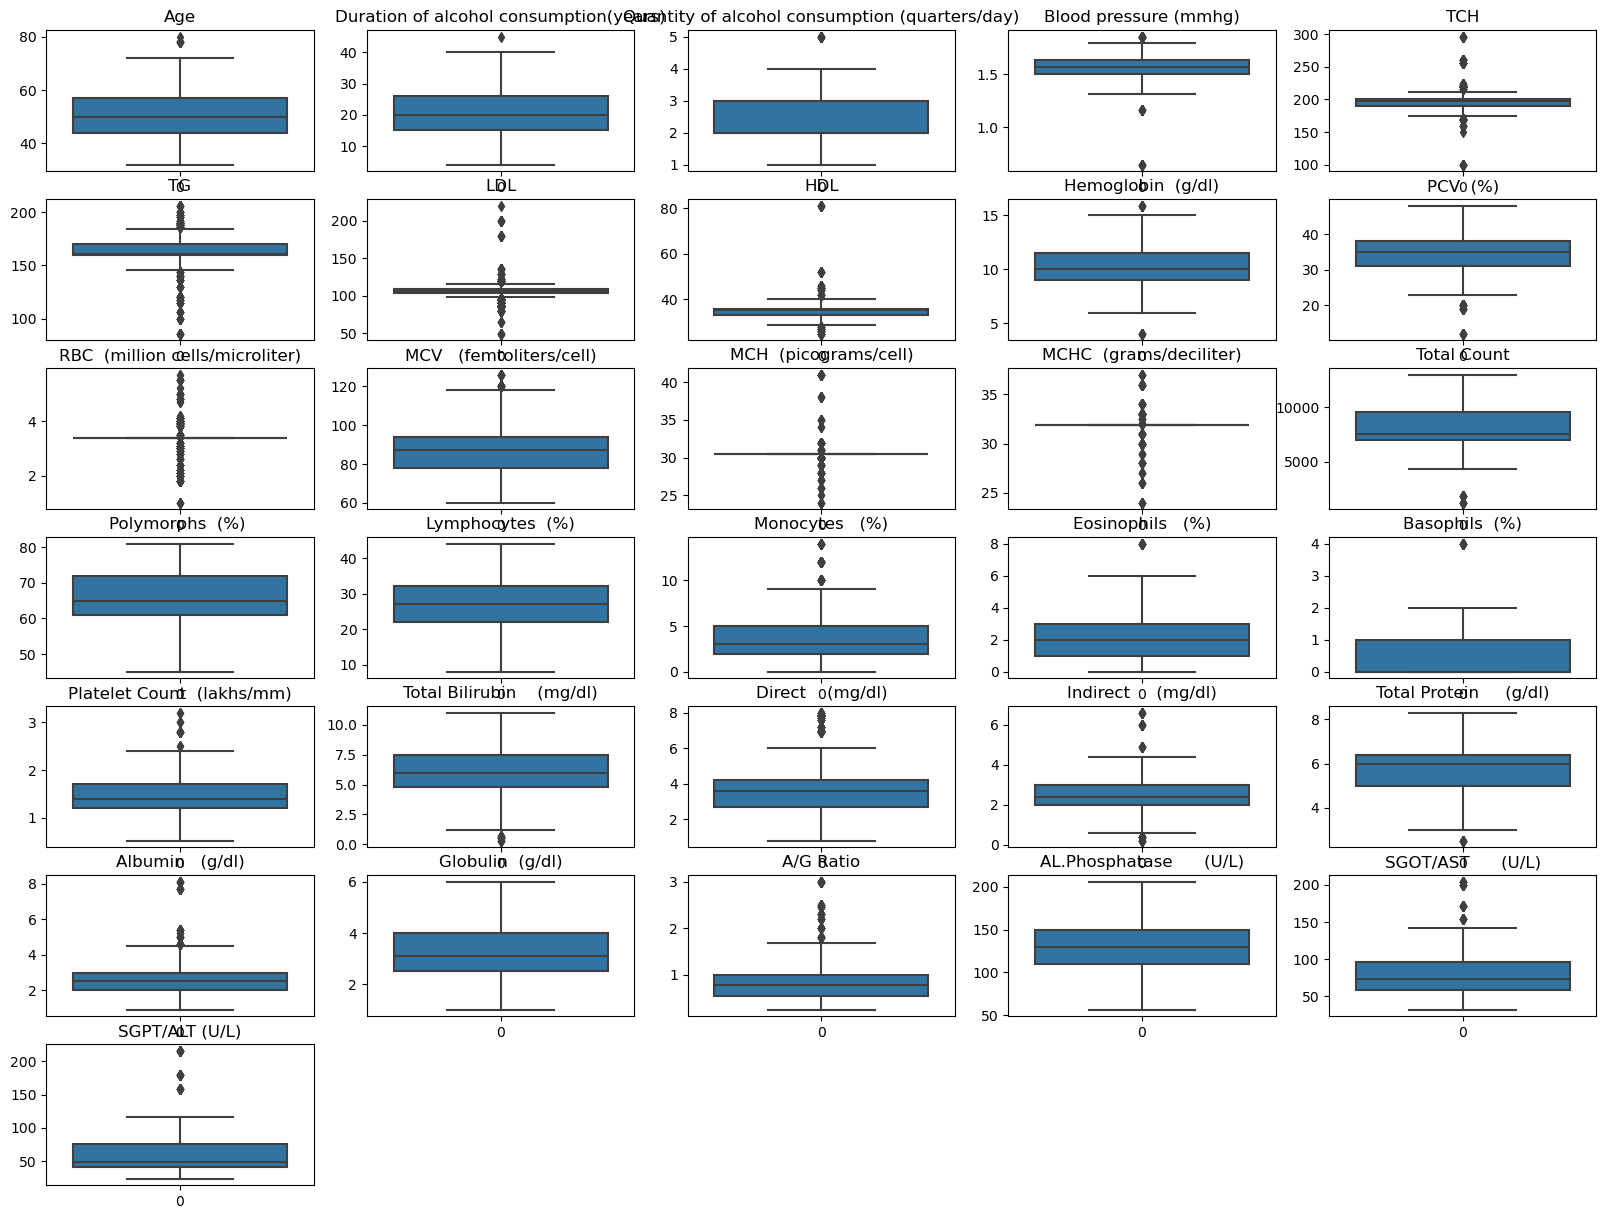

In [63]:
c=0
plt.figure(figsize=(20,15))
for i in df.columns:
  if(type(df[i][0])!=str):
    plt.subplot(7,5,c+1)
    # Attempt to convert the column to numeric, handling errors by coercing them to NaN
    sns.boxplot(df[i].apply(pd.to_numeric, errors='coerce'))
    plt.title(i)
    c=c+1
plt.show()

In [64]:
def remove_outliers(df, columns):
  for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound,np.where(df[col] > upper_bound, upper_bound, df[col]))

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
remove_outliers(df, numerical_columns)

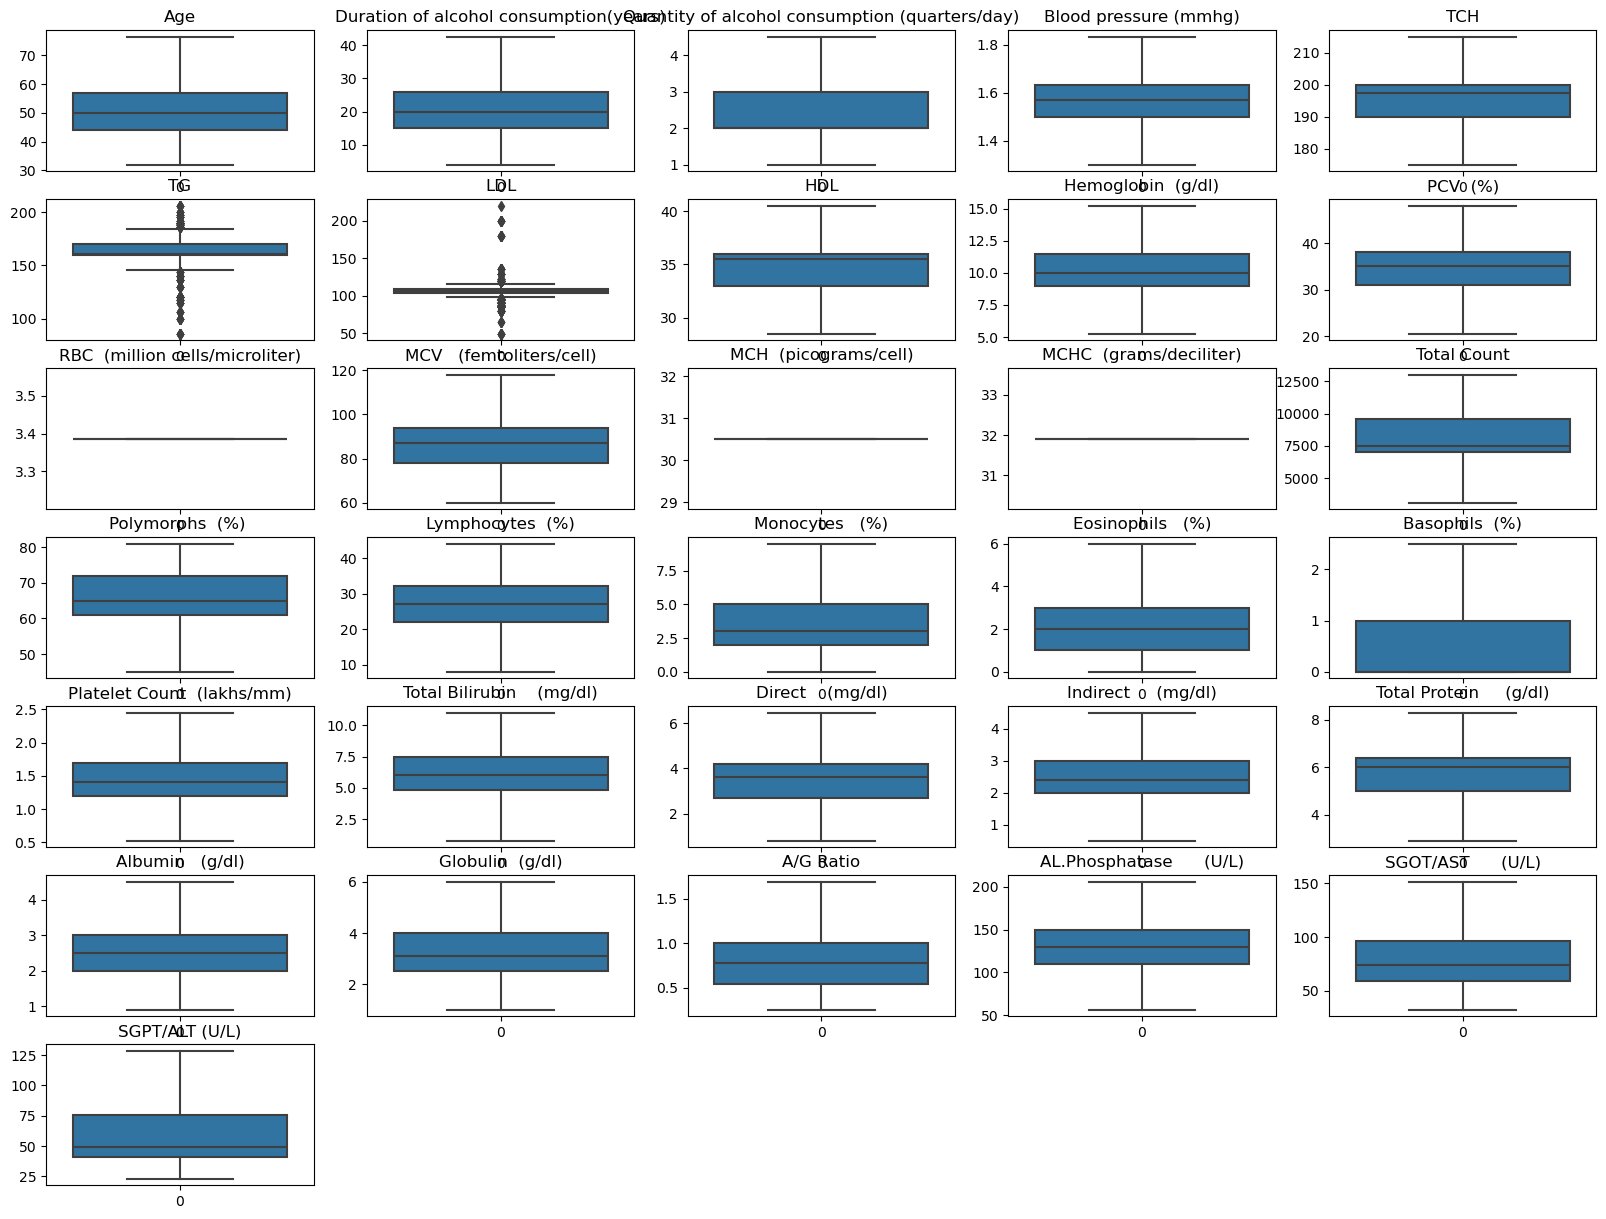

In [65]:
c=0
plt.figure(figsize=(20,15))
for i in df.columns:
  if(type(df[i][0])!=str):
    plt.subplot(7,5,c+1)
    # Attempt to convert the column to numeric, handling errors by coercing them to NaN
    sns.boxplot(df[i].apply(pd.to_numeric, errors='coerce'))
    plt.title(i)
    c=c+1
plt.show()

C:\Users\arshi\AppData\Local\Temp\ipykernel_14804\1825834726.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\arshi\Music\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\arshi\AppData\Local\Temp\ipykernel_14804\1825834726.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) 

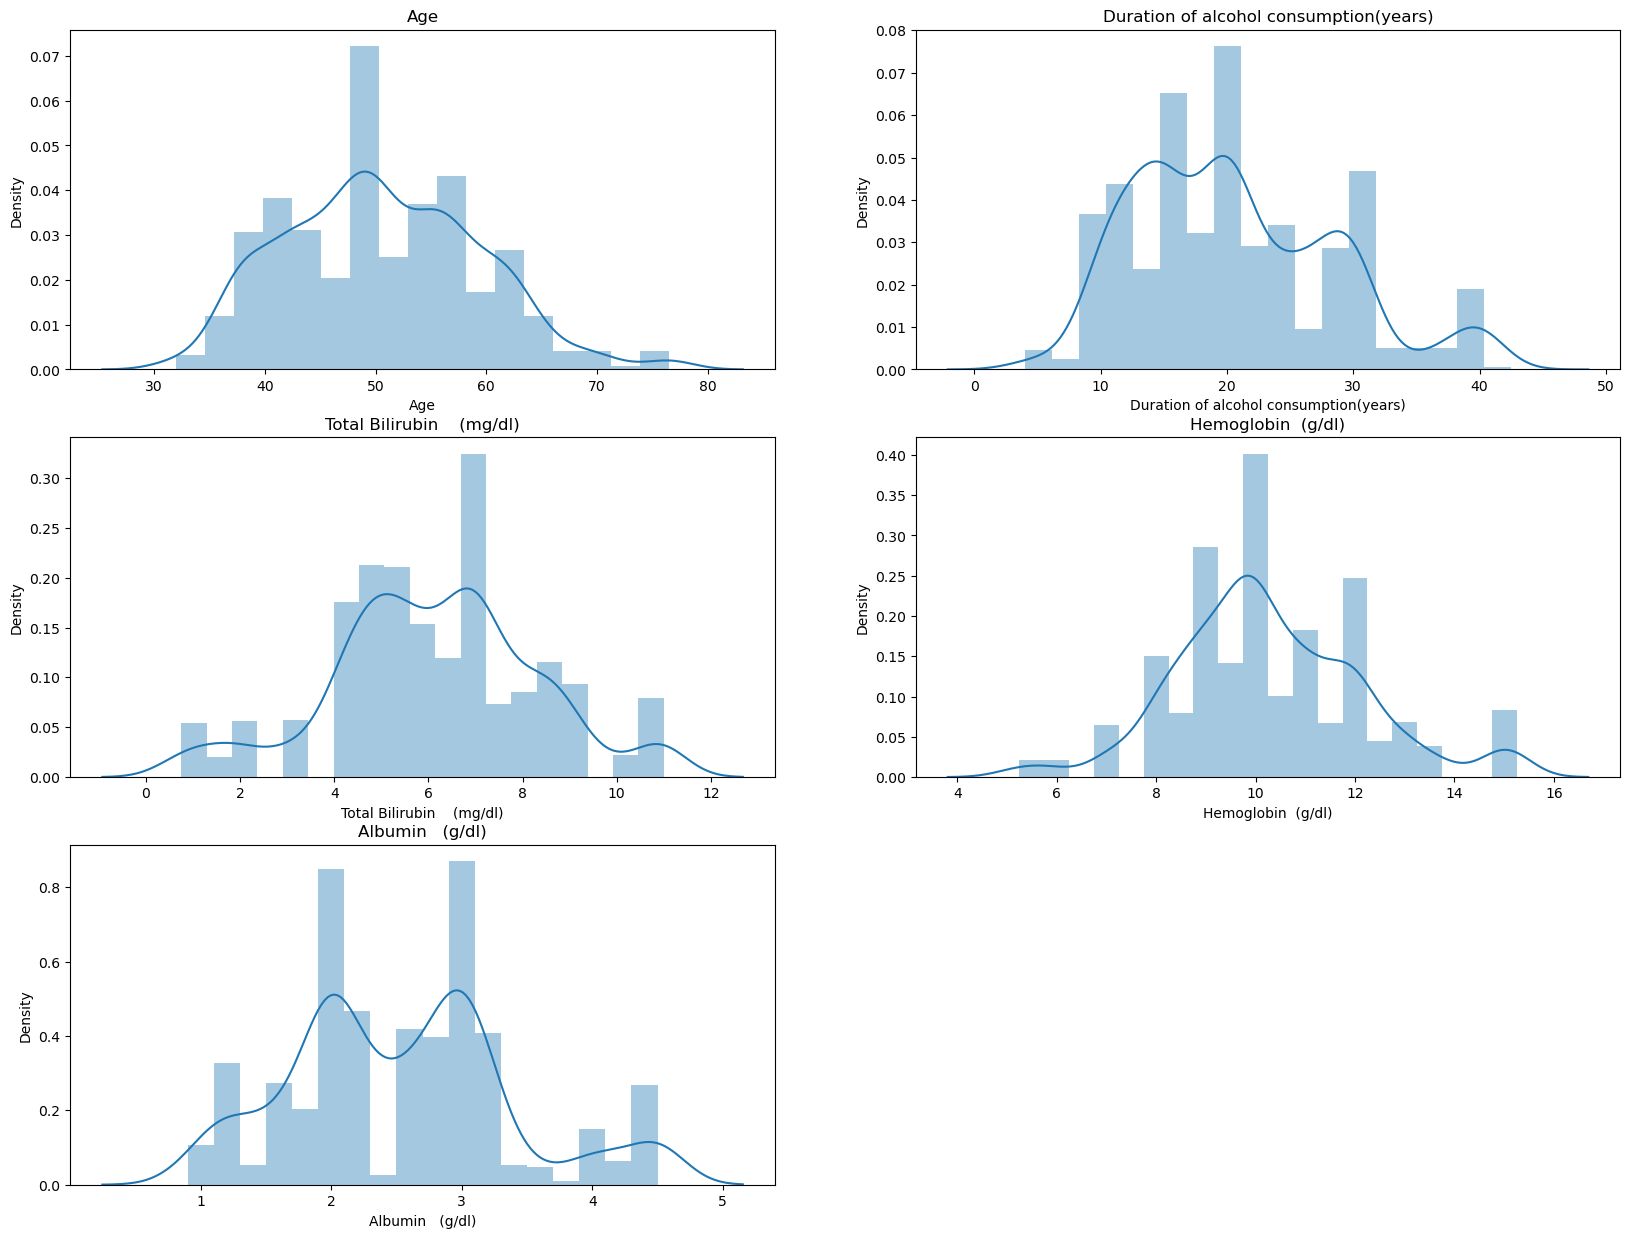

In [66]:
l=['Age','Duration of alcohol consumption(years)','Total Bilirubin    (mg/dl)','Hemoglobin  (g/dl)','Albumin   (g/dl)']

plt.figure(figsize=(20, 15))

for i, col in enumerate(l):
    plt.subplot(3, 2, i + 1)
    sns.distplot(df[col])
    plt.title(col)

plt.show()

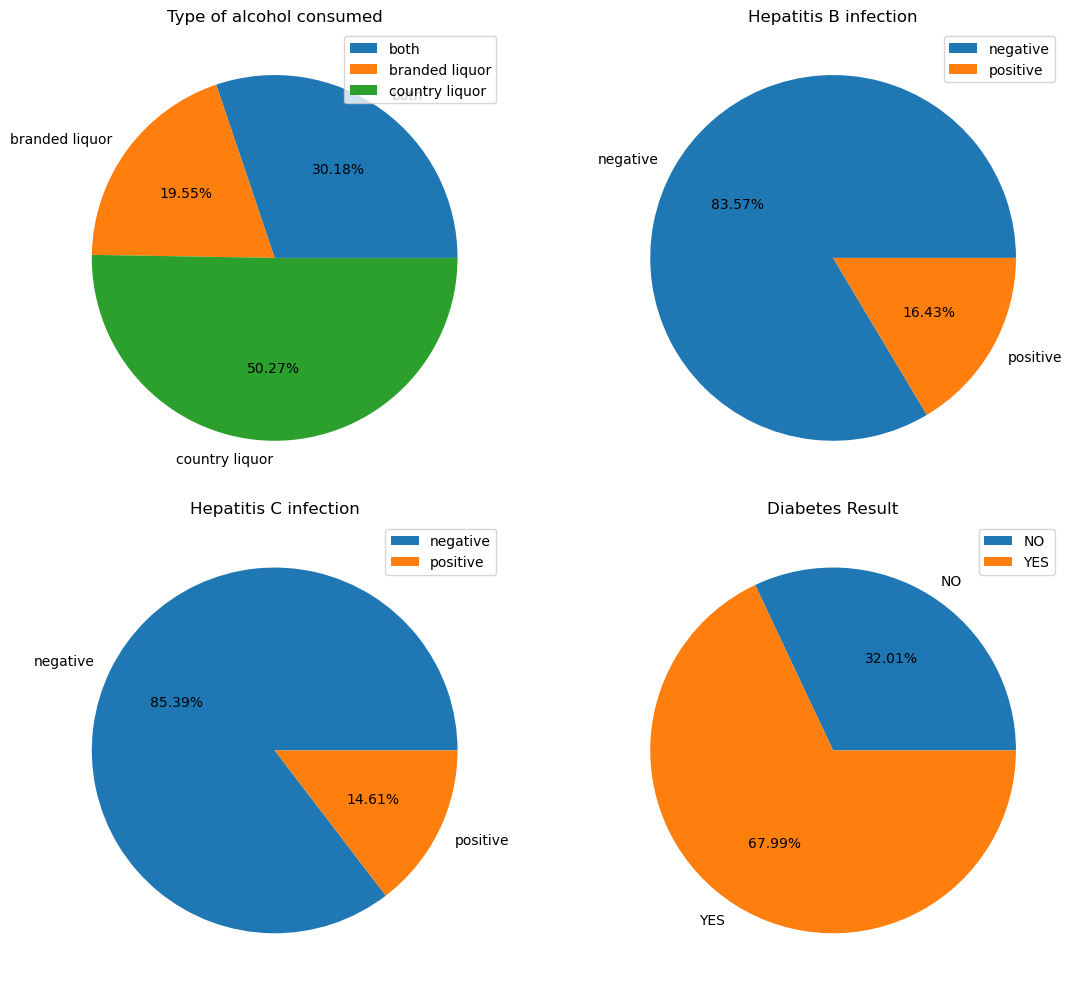

In [67]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Type of alcohol consumed
df.groupby("Type of alcohol consumed").size().plot(kind="pie", autopct="%.2f%%", ax=axes[0, 0], legend=True)
axes[0, 0].set_title("Type of alcohol consumed")

# Hepatitis B infection
df.groupby("Hepatitis B infection").size().plot(kind="pie", autopct="%.2f%%", ax=axes[0, 1], legend=True)
axes[0, 1].set_title("Hepatitis B infection")

# Hepatitis C infection
df.groupby("Hepatitis C infection").size().plot(kind="pie", autopct="%.2f%%", ax=axes[1, 0], legend=True)
axes[1, 0].set_title("Hepatitis C infection")

# Diabetes Result
df.groupby("Diabetes Result").size().plot(kind="pie", autopct="%.2f%%", ax=axes[1, 1], legend=True)
axes[1, 1].set_title("Diabetes Result")



plt.tight_layout()
plt.show()

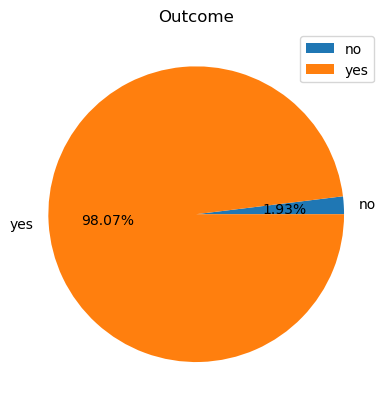

In [68]:
df.groupby("Outcome").size().plot(kind="pie", autopct="%.2f%%",legend=True)
plt.title('Outcome')
plt.show()

<Axes: xlabel='Outcome', ylabel='Age'>

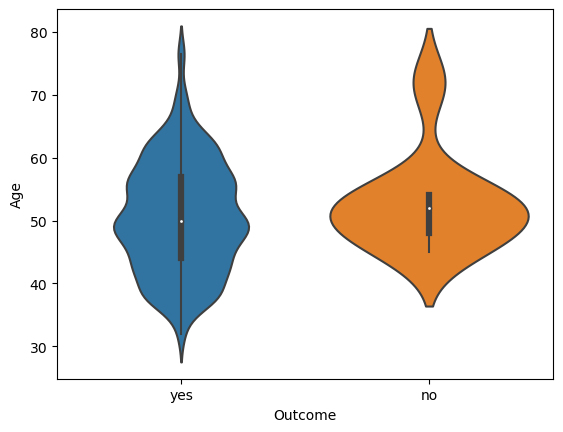

In [69]:
sns.violinplot(y=df["Age"],x=df["Outcome"])

<Axes: xlabel='Outcome', ylabel='Total Protein     (g/dl)'>

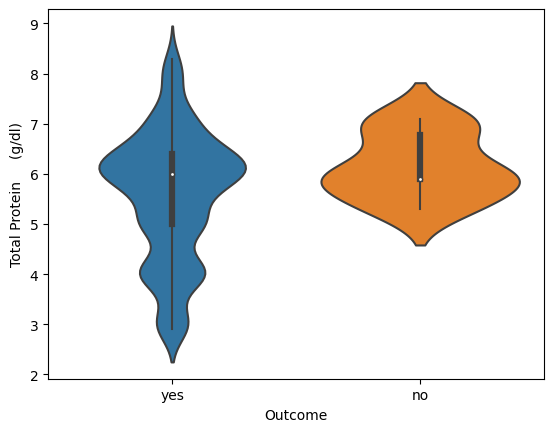

In [70]:
sns.violinplot(y=df["Total Protein     (g/dl)"],x=df["Outcome"])

<Axes: xlabel='Outcome', ylabel='Hemoglobin  (g/dl)'>

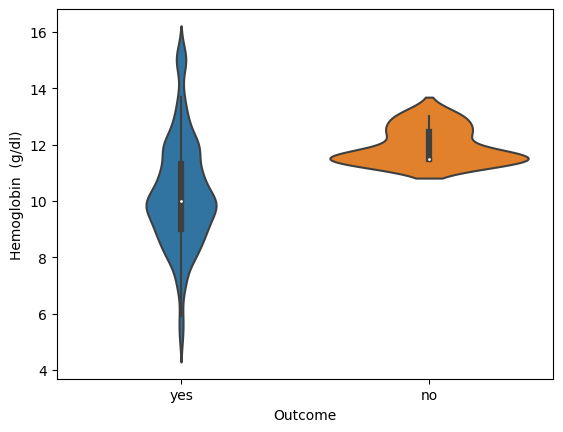

In [71]:
sns.violinplot(y=df["Hemoglobin  (g/dl)"],x=df["Outcome"])

<Axes: xlabel='Gender', ylabel='count'>

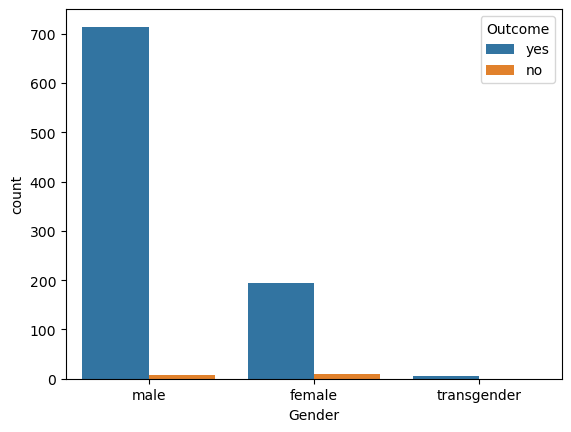

In [72]:
sns.countplot(data=df,x="Gender",hue="Outcome")

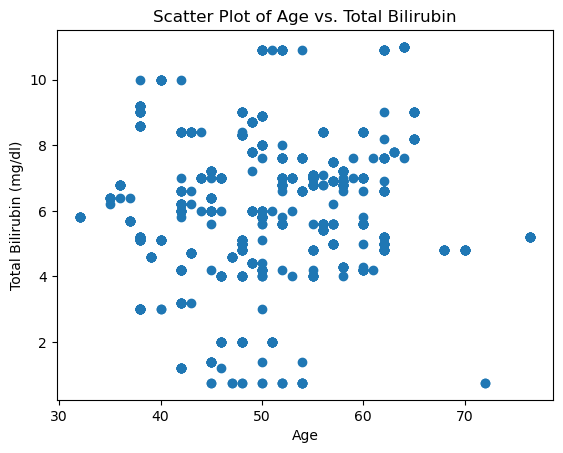

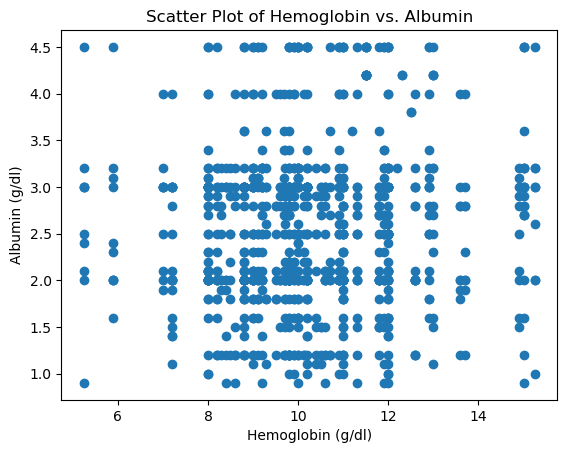

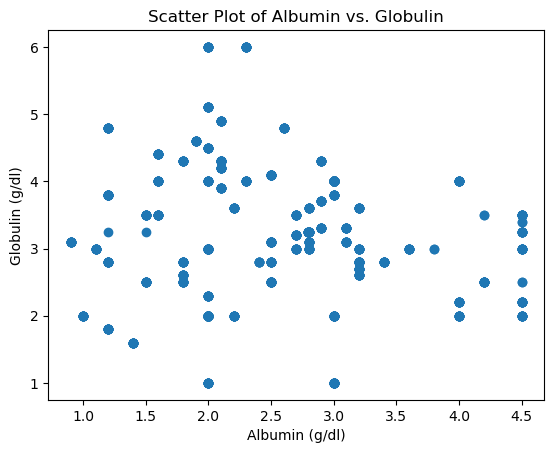

In [73]:
import matplotlib.pyplot as plt
# Scatter plot of Age vs. Total Bilirubin
plt.scatter(df["Age"], df["Total Bilirubin    (mg/dl)"])
plt.xlabel("Age")
plt.ylabel("Total Bilirubin (mg/dl)")
plt.title("Scatter Plot of Age vs. Total Bilirubin")
plt.show()

# Scatter plot of Hemoglobin vs. Albumin
plt.scatter(df["Hemoglobin  (g/dl)"], df["Albumin   (g/dl)"])
plt.xlabel("Hemoglobin (g/dl)")
plt.ylabel("Albumin (g/dl)")
plt.title("Scatter Plot of Hemoglobin vs. Albumin")
plt.show()

# Scatter plot of Albumin vs. Globulin
plt.scatter(df["Albumin   (g/dl)"], df["Globulin  (g/dl)"])
plt.xlabel("Albumin (g/dl)")
plt.ylabel("Globulin (g/dl)")
plt.title("Scatter Plot of Albumin vs. Globulin")
plt.show()

In [74]:
df1=df.copy()

In [75]:
df1.drop(columns=["Gender",'TCH','TG','LDL','RBC  (million cells/microliter)','MCH  (picograms/cell)','MCHC  (grams/deciliter)','Total Count','Eosinophils   (%)','Globulin  (g/dl)'],inplace=True)

In [76]:
df1.corr(numeric_only=True)

,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Blood pressure (mmhg),HDL,Hemoglobin (g/dl),PCV (%),MCV (femtoliters/cell),Polymorphs (%),Lymphocytes (%),...,Platelet Count (lakhs/mm),Total Bilirubin (mg/dl),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
Age,1.000000,0.504880,-0.014838,-0.051067,0.027021,0.005643,0.097591,0.044536,0.102051,-0.051998,...,0.071371,0.111111,0.056810,0.241744,0.061647,-0.025472,-0.072670,0.117445,0.051609,0.104097
Duration of alcohol consumption(years),0.504880,1.000000,0.013511,0.052442,0.102488,-0.066525,-0.003214,0.275167,0.263651,-0.363089,...,-0.093403,-0.180130,-0.258064,0.098370,-0.127660,-0.266224,-0.150173,0.312834,0.305667,0.220968
Quantity of alcohol consumption (quarters/day),-0.014838,0.013511,1.000000,-0.235936,0.087929,-0.028515,-0.106242,-0.003966,-0.001482,0.102467,...,0.111797,-0.058668,-0.070019,0.068496,-0.176093,-0.004464,0.128809,-0.094731,-0.062926,-0.080740
Blood pressure (mmhg),-0.051067,0.052442,-0.235936,1.000000,-0.047842,-0.012078,0.018328,0.071560,0.248554,0.012415,...,0.130282,-0.076937,-0.112301,0.029902,-0.027565,0.105403,0.117146,0.047766,0.086927,-0.055243
HDL,0.027021,0.102488,0.087929,-0.047842,1.000000,-0.031386,-0.042923,-0.003529,-0.170594,-0.014607,...,-0.145335,0.038456,-0.001202,0.038557,0.038159,-0.181625,-0.173873,-0.143857,0.071819,0.064580
Hemoglobin (g/dl),0.005643,-0.066525,-0.028515,-0.012078,-0.031386,1.000000,-0.006746,-0.026800,-0.023490,0.010444,...,0.021393,-0.046225,0.015173,-0.019270,0.036043,0.069044,0.040801,-0.009615,-0.009007,-0.046745
PCV (%),0.097591,-0.003214,-0.106242,0.018328,-0.042923,-0.006746,1.000000,-0.215279,-0.061485,0.099383,...,0.260573,0.006346,0.124041,-0.147214,0.310499,0.348276,0.120090,0.003518,-0.152265,-0.186766
MCV (femtoliters/cell),0.044536,0.275167,-0.003966,0.071560,-0.003529,-0.026800,-0.215279,1.000000,0.096923,-0.223638,...,0.029725,-0.301073,-0.408698,-0.007832,-0.193946,-0.129655,0.021159,-0.043319,0.278110,0.235697
Polymorphs (%),0.102051,0.263651,-0.001482,0.248554,-0.170594,-0.023490,-0.061485,0.096923,1.000000,-0.479791,...,-0.056582,0.096292,-0.048245,0.163071,-0.079210,-0.153799,-0.044456,0.047370,-0.100152,0.067920
Lymphocytes (%),-0.051998,-0.363089,0.102467,0.012415,-0.014607,0.010444,0.099383,-0.223638,-0.479791,1.000000,...,0.382883,0.087118,0.220090,-0.092456,0.180241,0.387191,0.197401,0.006548,-0.215464,-0.283448


<Axes: >

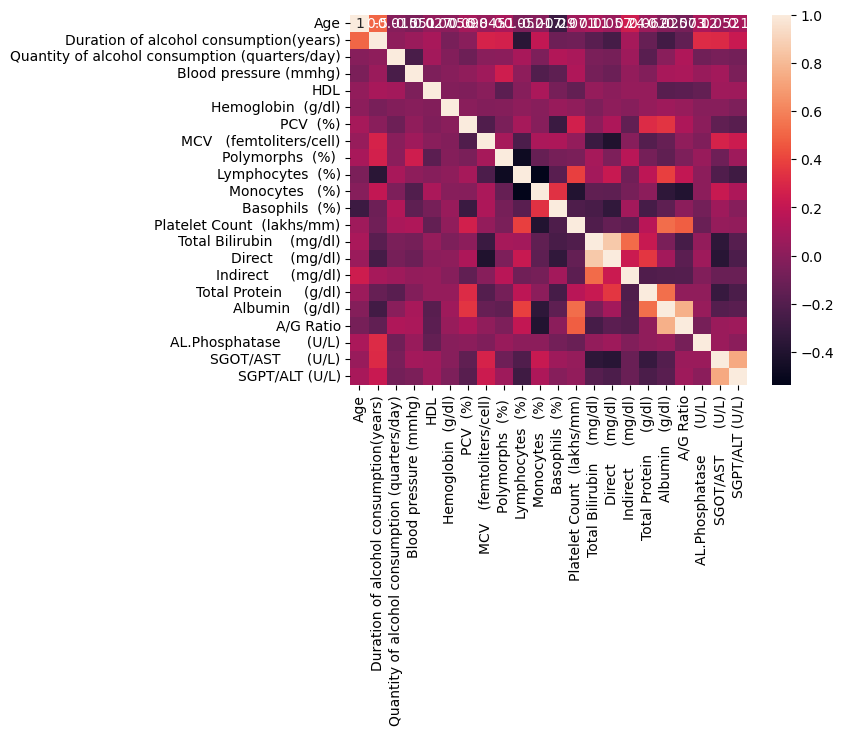

In [77]:
sns.heatmap(df1.corr(numeric_only=True),annot=True)

In [78]:
correlation_matrix = df1.corr(numeric_only=True)
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))
for pair in high_correlation_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2] * 100:.2f}%")

Total Bilirubin    (mg/dl) and Direct    (mg/dl): 86.07%


In [79]:
df.describe()

,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Blood pressure (mmhg),TCH,TG,LDL,HDL,Hemoglobin (g/dl),PCV (%),...,Total Bilirubin (mg/dl),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
count,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,...,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000
mean,50.588614,20.552632,2.195489,1.567364,195.816696,161.030075,106.309345,34.914618,10.266305,33.900873,...,6.118582,3.704834,2.423035,5.595907,2.529510,3.225369,0.855725,132.292207,80.383459,59.821697
std,8.747285,7.978730,0.817103,0.119739,10.909775,20.408020,17.220609,3.262292,1.887182,5.307312,...,2.195534,1.573631,0.937483,1.265447,0.853937,0.995112,0.396936,27.271596,27.019867,25.076247
min,32.000000,4.000000,1.000000,1.300000,175.000000,86.000000,49.000000,28.500000,5.250000,20.500000,...,0.750000,0.800000,0.500000,2.900000,0.900000,1.000000,0.250000,56.000000,32.000000,23.000000
25%,44.000000,15.000000,2.000000,1.500000,190.000000,160.000000,104.000000,33.000000,9.000000,31.000000,...,4.800000,2.700000,2.000000,5.000000,2.000000,2.500000,0.540000,110.000000,59.000000,41.000000
50%,50.000000,20.000000,2.000000,1.571429,197.423932,161.000000,106.000000,35.516464,10.000000,35.000000,...,6.000000,3.600000,2.400000,6.000000,2.500000,3.100000,0.780000,130.000000,74.000000,49.000000
75%,57.000000,26.000000,3.000000,1.633333,200.000000,170.000000,109.000000,36.000000,11.500000,38.000000,...,7.500000,4.200000,3.000000,6.400000,3.000000,4.000000,1.000000,150.000000,96.000000,76.000000
max,76.500000,42.500000,4.500000,1.833333,215.000000,206.000000,220.000000,40.500000,15.250000,48.000000,...,11.000000,6.450000,4.500000,8.300000,4.500000,6.000000,1.690000,206.000000,151.500000,128.500000


In [80]:
df.mean(axis=0,numeric_only=True)

Age                                                 50.588614
Duration of alcohol consumption(years)              20.552632
Quantity of alcohol consumption (quarters/day)       2.195489
Blood pressure (mmhg)                                1.567364
TCH                                                195.816696
TG                                                 161.030075
LDL                                                106.309345
HDL                                                 34.914618
Hemoglobin  (g/dl)                                  10.266305
PCV  (%)                                            33.900873
RBC  (million cells/microliter)                      3.386582
MCV   (femtoliters/cell)                            87.434408
MCH  (picograms/cell)                               30.512111
MCHC  (grams/deciliter)                             31.907273
Total Count                                       8149.711704
Polymorphs  (%)                                     66.932331
Lymphocy

In [81]:
import pandas as pd
import random

# Select rows where Outcome is "NO"
df_no_outcome = df[df["Outcome"] == "no"]

# Check if df_no_outcome is empty and handle it accordingly
if df_no_outcome.empty:
    print("No rows found with 'NO' outcome. Cannot generate synthetic data.")
else:
    # Generate synthetic rows based on existing "NO" outcome rows
    synthetic_rows = []
    num_synthetic_samples = 300  # Number of synthetic samples to generate

    for _ in range(num_synthetic_samples):
        # Randomly select a row from df_no_outcome
        selected_row = df_no_outcome.sample(n=1).iloc[0]

        # Create a new row with random values based on the selected row
        synthetic_row = selected_row.copy()
        for column in df_no_outcome.columns:
            if df_no_outcome[column].dtype in ["int64", "float64"]:
                # Add noise within a 10% range of the selected row's value
                noise_factor = 0.1 * selected_row[column]
                synthetic_row[column] = random.uniform(selected_row[column] - noise_factor, selected_row[column] + noise_factor)
            elif df_no_outcome[column].dtype == "object":
                synthetic_row[column] = random.choice(df_no_outcome[column].unique())

        synthetic_rows.append(synthetic_row)

    # Convert synthetic rows to a DataFrame and append to the original DataFrame
    synthetic_df = pd.DataFrame(synthetic_rows, columns=df_no_outcome.columns)
    df = pd.concat([df, synthetic_df], ignore_index=True)

In [82]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in X.columns:
  if X[i].dtype == 'object':
    X[i] = le.fit_transform(X[i])

In [84]:
y_encoded =(le.fit_transform(y))
X.head()

,Age,Gender,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Blood pressure (mmhg),Obesity,...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not)
0,55.0,1,12.0,2.0,1,0,0,1,1.533333,1,...,4.0,3.0,6.0,3.0,4.0,0.75,150.0,56.0,34.0,0
1,55.0,1,12.0,2.0,1,0,0,1,1.533333,1,...,4.0,3.0,6.0,3.0,4.0,0.75,150.0,56.0,34.0,0
2,55.0,1,12.0,2.0,1,0,0,1,1.533333,0,...,4.0,3.0,6.0,3.0,4.0,0.75,150.0,56.0,34.0,0
3,55.0,1,12.0,2.0,1,0,0,0,1.533333,0,...,4.0,3.0,6.0,3.0,4.0,0.75,150.0,56.0,34.0,0
4,55.0,0,12.0,2.0,1,0,0,1,1.533333,0,...,4.0,3.0,6.0,3.0,4.0,0.75,150.0,56.0,34.0,0


In [85]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)
importances = model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

Age: 0.0001
Gender: 0.0000
Duration of alcohol consumption(years): 0.1617
Quantity of alcohol consumption (quarters/day): 0.0144
Type of alcohol consumed: 0.0009
Hepatitis B infection: 0.0002
Hepatitis C infection: 0.0000
Diabetes Result: 0.0146
Blood pressure (mmhg): 0.0000
Obesity: 0.0062
Family history of cirrhosis/ hereditary: 0.0000
TCH: 0.0000
TG: 0.0000
LDL: 0.0006
HDL: 0.0000
Hemoglobin  (g/dl): 0.0015
PCV  (%): 0.0060
RBC  (million cells/microliter): 0.0312
MCV   (femtoliters/cell): 0.0000
MCH  (picograms/cell): 0.0220
MCHC  (grams/deciliter): 0.0239
Total Count: 0.0001
Polymorphs  (%) : 0.0048
Lymphocytes  (%): 0.0017
Monocytes   (%): 0.0000
Eosinophils   (%): 0.0000
Basophils  (%): 0.0104
Platelet Count  (lakhs/mm): 0.0211
Total Bilirubin    (mg/dl): 0.2311
Direct    (mg/dl): 0.0932
Indirect     (mg/dl): 0.0161
Total Protein     (g/dl): 0.0035
Albumin   (g/dl): 0.0841
Globulin  (g/dl): 0.0014
A/G Ratio: 0.0353
AL.Phosphatase      (U/L): 0.0127
SGOT/AST      (U/L): 0.0601
SGP

In [86]:
drop_col=["Type of alcohol consumed","Gender","Direct    (mg/dl)","MCH  (picograms/cell)","MCHC  (grams/deciliter)","Obesity","Family history of cirrhosis/ hereditary","TCH","LDL","HDL","MCV   (femtoliters/cell)","Total Count","Monocytes   (%)","Basophils  (%)","SGOT/AST      (U/L)","SGPT/ALT (U/L)","MCHC  (grams/deciliter)","RBC  (million cells/microliter)","Quantity of alcohol consumption (quarters/day): 0.0110","Eosinophils   (%)","TG","Hepatitis B infection","Hepatitis C infection","Duration of alcohol consumption(years)","Total Bilirubin    (mg/dl)"]

In [87]:
for col in drop_col:
  if col in X.columns:
    X.drop(columns=[col],inplace=True)

In [88]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)
importances = model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

Age: 0.0028
Quantity of alcohol consumption (quarters/day): 0.0677
Diabetes Result: 0.0468
Blood pressure (mmhg): 0.0010
Hemoglobin  (g/dl): 0.0259
PCV  (%): 0.0055
Polymorphs  (%) : 0.0058
Lymphocytes  (%): 0.0061
Platelet Count  (lakhs/mm): 0.0683
Indirect     (mg/dl): 0.0203
Total Protein     (g/dl): 0.0108
Albumin   (g/dl): 0.2046
Globulin  (g/dl): 0.0169
A/G Ratio: 0.1302
AL.Phosphatase      (U/L): 0.0424
USG Abdomen (diffuse liver or  not): 0.3448


In [89]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [90]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(random_state=0)
X_resampled, y_resampled = os.fit_resample(X_train, y_train)
X_resampled.columns

Index(['Age', 'Quantity of alcohol consumption (quarters/day)',
       'Diabetes Result', 'Blood pressure (mmhg)', 'Hemoglobin  (g/dl)',
       'PCV  (%)', 'Polymorphs  (%) ', 'Lymphocytes  (%)',
       'Platelet Count  (lakhs/mm)', 'Indirect     (mg/dl)',
       'Total Protein     (g/dl)', 'Albumin   (g/dl)', 'Globulin  (g/dl)',
       'A/G Ratio', 'AL.Phosphatase      (U/L)',
       'USG Abdomen (diffuse liver or  not)'],
      dtype='object')

In [91]:
y_resampled_series = pd.Series(y_resampled)

y_resampled_series.value_counts()

0    724
1    724
Name: count, dtype: int64

In [92]:
odel = svm.SVC()
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_resampled)
print("Train Accuracy:", accuracy_score(y_resampled, y_pred))

Train Accuracy: 1.0


In [93]:
odel = svm.SVC()
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_resampled)
print("Train Accuracy:", accuracy_score(y_resampled, y_pred))

Train Accuracy: 1.0


In [94]:
model = svm.SVC()
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_matrix)

classification_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_report)

Test Accuracy: 0.902834008097166
Confusion Matrix:
[[ 57   1]
 [ 23 166]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.98      0.83        58
           1       0.99      0.88      0.93       189

    accuracy                           0.90       247
   macro avg       0.85      0.93      0.88       247
weighted avg       0.93      0.90      0.91       247



In [95]:
model = svm.SVC(C=0.1,kernel="rbf")
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_matrix)

classification_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_report)

Test Accuracy: 0.8744939271255061
Confusion Matrix:
[[ 49   9]
 [ 22 167]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.84      0.76        58
           1       0.95      0.88      0.92       189

    accuracy                           0.87       247
   macro avg       0.82      0.86      0.84       247
weighted avg       0.89      0.87      0.88       247



In [96]:
model = LogisticRegression(max_iter=1000,penalty="l2",solver="lbfgs",C=0.001)
model.fit(X_resampled, y_resampled)


y_pred = model.predict(X_resampled)

print("Test Accuracy:", accuracy_score(y_resampled, y_pred))

Test Accuracy: 0.955110497237569


In [97]:
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000,penalty="l2",solver="lbfgs",C=0.001)
model.fit(X_resampled, y_resampled)


y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))

confusion_matrix = confusion_matrix(y_test, y_pred)


print("Confusion Matrix:")
print(confusion_matrix)

classification_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_report)

Test Accuracy: 0.9190283400809717
Confusion Matrix:
[[ 57   1]
 [ 19 170]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        58
           1       0.99      0.90      0.94       189

    accuracy                           0.92       247
   macro avg       0.87      0.94      0.90       247
weighted avg       0.94      0.92      0.92       247



In [98]:
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(penalty="l1",C=0.01,solver="liblinear")
model.fit(X_resampled, y_resampled)


y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))

confusion_matrix = confusion_matrix(y_test, y_pred)


print("Confusion Matrix:")
print(confusion_matrix)

classification_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_report)

Test Accuracy: 0.9554655870445344
Confusion Matrix:
[[ 57   1]
 [ 10 179]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        58
           1       0.99      0.95      0.97       189

    accuracy                           0.96       247
   macro avg       0.92      0.96      0.94       247
weighted avg       0.96      0.96      0.96       247



In [99]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_leaf=300)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Test Accuracy: 0.9757085020242915
Precision: 1.0
Recall: 0.9682539682539683
F1 Score: 0.9838709677419354


In [100]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Test Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [101]:
X.to_csv('new_data1.csv', index=False)

In [102]:
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)


y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))

confusion_matrix = confusion_matrix(y_test, y_pred)


print("Confusion Matrix:")
print(confusion_matrix)

classification_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_report)

Test Accuracy: 1.0
Confusion Matrix:
[[ 58   0]
 [  0 189]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00       189

    accuracy                           1.00       247
   macro avg       1.00      1.00      1.00       247
weighted avg       1.00      1.00      1.00       247



In [103]:
df.to_csv('new_data.csv', index=False)

In [104]:
"""import pickle
filename = 'liver_cirosis.pkl'
pickle.dump(model, open(filename, 'wb'))"""

"import pickle\nfilename = 'liver_cirosis.pkl'\npickle.dump(model, open(filename, 'wb'))"

In [105]:
"""filename = 'logreg_liver_cirosis_model.pkl'
joblib.dump(model,filename)"""

"filename = 'logreg_liver_cirosis_model.pkl'\njoblib.dump(model,filename)"

In [106]:
import joblib

# Assuming 'model' is your trained model (like LogisticRegression, etc.)
filename = 'logreg_liver_cirosis_model.pkl'
joblib.dump(model, filename)


['logreg_liver_cirosis_model.pkl']